In [1]:
# Import
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from random import sample

2023-08-14 15:56:22.787913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# KRONOS DATA
HeLa_1_df  = pd.read_csv ('HeLa_1_scMatrix.tsv.gz', sep='\t')
HeLa_2_df  = pd.read_csv ('HeLa_2_scMatrix.tsv.gz', sep='\t')
JEFF_1_df  = pd.read_csv ('JEFF_1_scMatrix.tsv.gz', sep='\t')
JEFF_2_df  = pd.read_csv ('JEFF_2_scMatrix.tsv.gz', sep='\t')
MCF7_First_df  = pd.read_csv ('MCF7_unsorted_scMatrix.tsv.gz', sep='\t')
MCF7_Normal_df  = pd.read_csv ('MCF7_Normal_scMatrix.tsv.gz', sep='\t')

# MASSEYKOREN DATA
GM12878_G1_library1_replicate1_df  = pd.read_csv ('GM12878-G1_scMatrix.tsv.gz', sep='\t')
GM12878_G2_library1_replicate1_df  = pd.read_csv ('GM12878-G2_scMatrix.tsv.gz', sep='\t')
GM12878_S_library1_replicate1_df  = pd.read_csv ('GM12878-S_scMatrix.tsv.gz', sep='\t')
GM12878_earlyS_library1_replicate1_df  = pd.read_csv ('GM12878-earlyS_scMatrix.tsv.gz', sep='\t')
GM12878_lateS_library1_replicate1_df  = pd.read_csv ('GM12878-lateS_scMatrix.tsv.gz', sep='\t')

# DU DATA
HCT116_DKO1_G1_df  = pd.read_csv ('HCT116_DKO1_scRepli-Seq_G1_scMatrix.tsv.gz', sep='\t')
HCT116_DKO1_S_df  = pd.read_csv ('HCT116_DKO1_scRepli-Seq_S_scMatrix.tsv.gz', sep='\t')
HCT116_WT_G1_df  = pd.read_csv ('HCT116_WT_scRepli-Seq_G1_scMatrix.tsv.gz', sep='\t')
HCT116_WT_S_df  = pd.read_csv ('HCT116_WT_scRepli-Seq_S_scMatrix.tsv.gz', sep='\t')

# Takahashi DATA
Takahashi_df = pd.read_csv ('Takahashi19_scMatrix.tsv.gz', sep='\t')

In [3]:
JEFF_1_df.head()

,Cell,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,...,chrY:25600000-25700000,chrY:25700000-25800000,chrY:25800000-25900000,chrY:25900000-26000000,chrY:26000000-26100000,chrY:26100000-26200000,chrY:26200000-26300000,chrY:26300000-26400000,chrY:26400000-26500000,chrY:26500000-26600000
0,AAACCTGAGATACACA-1_Hela1.bam,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
1,AAACCTGAGTAGATCA-1_Hela1.bam,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
2,AAACCTGCAAACTCAC-1_Hela1.bam,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
3,AAACCTGTCATCGCAA-1_Hela1.bam,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,AAACGGGAGTCAAGGC-1_Hela1.bam,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
KRONOS = pd.concat([HeLa_1_df,HeLa_2_df,JEFF_1_df,JEFF_2_df,MCF7_First_df,MCF7_Normal_df], ignore_index=True)
MK = pd.concat([GM12878_G1_library1_replicate1_df,GM12878_G2_library1_replicate1_df,GM12878_S_library1_replicate1_df,GM12878_earlyS_library1_replicate1_df,GM12878_lateS_library1_replicate1_df], ignore_index=True)
DU = pd.concat([HCT116_DKO1_G1_df,HCT116_DKO1_S_df,HCT116_WT_G1_df,HCT116_WT_S_df], ignore_index=True)
CNV_df = pd.concat([KRONOS,MK,DU,Takahashi_df], ignore_index=True)
#remove X/Y chr
CNV_df = CNV_df[CNV_df.columns.drop(list(CNV_df.filter(regex='chrX:')))]
CNV_df = CNV_df[CNV_df.columns.drop(list(CNV_df.filter(regex='chrY:')))]

CNV_df.head()

,Cell,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,...,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000,chr4:189900000-190000000,chr6:100000-200000,chr18:0-100000,chr19:200000-300000
0,AAACCTGAGGAGCGTT-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN
1,AAACCTGCAGTTTGCA-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN
2,AAACCTGGTCTCGGTG-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN
3,AAACCTGTCCTGACAA-1_Jeff1.bam,5,5,5,5,5,5,5,5,5,...,3,3,3,3,3,3,NaN,NaN,NaN,NaN
4,AAACGGGAGCTAGGCA-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN


In [5]:
# remove columns with >1% NaNs
perc = 1.0
min_count =  int(((100-perc)/100)*CNV_df.shape[0] + 1)
CNV_df = CNV_df.dropna( axis=1, 
                thresh=min_count)
CNV_df

,Cell,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
0,AAACCTGAGGAGCGTT-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
1,AAACCTGCAGTTTGCA-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
2,AAACCTGGTCTCGGTG-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
3,AAACCTGTCCTGACAA-1_Jeff1.bam,5,5,5,5,5,5,5,5,5,...,2,3,3,3,3,3,3,3,3,3
4,AAACGGGAGCTAGGCA-1_Jeff1.bam,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,GSM2904963_delDupl.bam,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
11713,GSM2904964_delDupl.bam,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
11714,GSM2904965_delDupl.bam,2,2,2,2,2,2,2,2,2,...,2,2,2,3,3,3,3,3,3,3
11715,GSM2904966_delDupl.bam,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3


In [6]:
#get metadata
metadata_df  = pd.read_csv ('KRONOS_MK_DU_CONNOLLY_TAKAHASHI_Cell_Types_Rep_Phase_v2.csv.gz', sep=',')
metadata_df.head()

,Cell,Type,Rep,Phase
0,AAACCTGAGATACACA-1_Hela1.bam,JEFF,JEFF_1,S
1,AAACCTGAGGAGCGTT-1_Jeff1.bam,HeLa,HeLa_1,S
2,AAACCTGAGTAGATCA-1_Hela1.bam,JEFF,JEFF_1,S
3,AAACCTGCAAACTCAC-1_Hela1.bam,JEFF,JEFF_1,S
4,AAACCTGCAACCCAAT-1_First_exp.bam,MCF7,MCF7_Unsorted,G1


In [7]:
all_data  = pd.merge(metadata_df, CNV_df, left_on='Cell', right_on='Cell', how='inner')
all_data.head(20)

,Cell,Type,Rep,Phase,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
0,AAACCTGAGATACACA-1_Hela1.bam,JEFF,JEFF_1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,AAACCTGAGGAGCGTT-1_Jeff1.bam,HeLa,HeLa_1,S,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
2,AAACCTGAGTAGATCA-1_Hela1.bam,JEFF,JEFF_1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,AAACCTGCAAACTCAC-1_Hela1.bam,JEFF,JEFF_1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,AAACCTGCAACCCAAT-1_First_exp.bam,MCF7,MCF7_Unsorted,G1,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
5,AAACCTGCAGTTTGCA-1_Jeff1.bam,HeLa,HeLa_1,G1,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
6,AAACCTGCATTGAAGA-1_Normal.bam,MCF7,MCF7,S,5,5,5,5,5,5,...,3,3,3,3,3,3,3,3,3,3
7,AAACCTGGTCATTACG-1_Normal.bam,MCF7,MCF7,S,2,2,2,2,2,2,...,2,2,2,2,2,2,3,3,3,3
8,AAACCTGGTCCGAAGA-1_Normal.bam,MCF7,MCF7,S,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3
9,AAACCTGGTCCTCGGA-1_Hela2.bam,JEFF,JEFF_2,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [8]:
all_data.Type.value_counts()

GM12878        2848
MCF7           2144
JEFF           1130
HeLa            523
HCT116          483
HCT116_DKO1     378
hTERT-RPE1       17
Name: Type, dtype: int64

In [9]:
all_data.Phase.value_counts()

S     5250
G1    2273
Name: Phase, dtype: int64

In [10]:
all_data[['Type','Phase']].value_counts(sort=False)

Type         Phase
GM12878      G1       1193
             S        1655
HCT116       G1         49
             S         434
HCT116_DKO1  G1         40
             S         338
HeLa         G1        224
             S         299
JEFF         G1        132
             S         998
MCF7         G1        632
             S        1512
hTERT-RPE1   G1          3
             S          14
dtype: int64

In [11]:
all_data[['Type','Rep','Phase']].value_counts(sort=False)

Type         Rep                         Phase
GM12878      EarlyS_library1_replicate1  S         602
             G1_library1_replicate1      G1        667
             G2_library1_replicate1      G1        526
             LateS_library1_replicate1   S         358
             S_library1_replicate1       S         695
HCT116       G1                          G1         49
             S                           S         434
HCT116_DKO1  G1                          G1         40
             S                           S         338
HeLa         HeLa_1                      G1        120
                                         S         136
             HeLa_2                      G1        104
                                         S         163
JEFF         JEFF_1                      G1         70
                                         S         575
             JEFF_2                      G1         62
                                         S         423
MCF7         MCF7 

In [12]:
metadata = all_data[['Cell','Type','Rep','Phase']]
all_data=all_data.drop(['Rep'], axis=1)

In [13]:
len(all_data.columns)

27884

In [15]:
G = all_data.loc[all_data.Phase == 'G1']
for ctype in np.unique(all_data.Type):
    print(ctype)
    ctype_dta = G.loc[G.Type == ctype]
    print(ctype_dta.median(numeric_only=True).median())

GM12878
2.0
HCT116
2.0
HCT116_DKO1
2.0
HeLa
3.0
JEFF
2.0
MCF7
4.0
hTERT-RPE1
2.0


In [205]:
#training dataset
x = sample(list(all_data.index),int(len(all_data.index)*.80))
x = all_data.drop(x).copy()
#testing
X = all_data.drop(x.index).copy()

In [206]:
# split into input (X) and output (y) variables
#Training
Y = X[["Phase"]]
Y = Y.Phase.astype("category").cat.codes
X = X.iloc[:,3:]
#Testing
y = x[["Phase"]]
y = y.Phase.astype("category").cat.codes
x = x.iloc[:,3:]


In [207]:
X #training

,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,chr1:1800000-1900000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,2,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
7519,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
7520,2,2,2,2,2,2,2,2,2,2,...,2,2,2,3,3,3,3,3,3,3
7521,2,2,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3


In [208]:
x #testing

,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,chr1:1800000-1900000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
4,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
12,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
20,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
27,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
38,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
7483,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7485,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7507,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [209]:
index = np.char.split(list(x.columns), sep =':')
index = np.delete(list(index), 1, 1)
index = [item for sublist in index for item in sublist]
np.unique(index)

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9'],
      dtype='<U5')

In [210]:
y

4       0
12      1
20      1
27      1
38      1
       ..
7482    1
7483    1
7485    1
7507    0
7514    1
Length: 1505, dtype: int8

In [211]:
regions = len(x.columns)
cells = len(x.index)
print(regions, cells)

27881 1505


In [212]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
# Define the data augmentation functions

def add_random_noise(dataframe, noise_factor):
    noisy_dataframe = dataframe.copy()  # Create a copy of the original dataframe
    num_columns = dataframe.shape[1]  # Number of columns in the dataframe

    for i, row in noisy_dataframe.iterrows():
        noise_percentage = np.random.uniform(0.05, 0.75)
        # Select a random subset of columns to add noise
        num_columns_noise = int(noise_percentage * num_columns)
        columns_noise = np.random.choice(dataframe.columns, num_columns_noise, replace=False)
        # Add random noise to the selected columns of the row
        noise = np.random.normal(loc=0, scale=noise_factor, size=num_columns_noise)
        row[columns_noise] += noise

    return noisy_dataframe

X_train, Y_train = X.copy(), Y.copy()

# Add random noise
noise_factor = 1  # Adjust the noise factor according to your preference
X_train_augmented = add_random_noise(X_train.sample(int(len(X_train)/2)).copy(), noise_factor)


# Concatenate the augmented data with the original training data
Y_train_augmented = pd.concat([Y_train, Y_train.loc[X_train_augmented.index.tolist()]], ignore_index=True)
X_train_augmented = pd.concat([X_train, X_train_augmented], ignore_index=True).round(0).abs()



In [213]:
X_train_augmented

,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,chr1:1500000-1600000,chr1:1600000-1700000,chr1:1700000-1800000,chr1:1800000-1900000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9023,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9024,3,3,3,3,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
9025,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [214]:
# Create a sequential model
model = Sequential()
# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(regions,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [215]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [216]:
from tensorflow.keras.callbacks import EarlyStopping
import random
# fit the model on the train dataset
callback = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
history = model.fit(X_train_augmented.astype(int).copy(), Y_train_augmented.copy(), batch_size=32, epochs=100, validation_data=(x.copy(), y.copy()),
                   use_multiprocessing=True, workers=6, callbacks=[callback])

Epoch 1/100
283/283 [==============================] - 5s 17ms/step - loss: 0.6215 - accuracy: 0.8954 - val_loss: 0.2266 - val_accuracy: 0.9289
Epoch 2/100
283/283 [==============================] - 4s 15ms/step - loss: 0.5197 - accuracy: 0.9239 - val_loss: 0.1819 - val_accuracy: 0.9728
Epoch 3/100
283/283 [==============================] - 4s 14ms/step - loss: 0.1915 - accuracy: 0.9541 - val_loss: 0.2057 - val_accuracy: 0.9581
Epoch 4/100
283/283 [==============================] - 4s 14ms/step - loss: 0.1491 - accuracy: 0.9616 - val_loss: 0.0837 - val_accuracy: 0.9807
Epoch 5/100
283/283 [==============================] - 4s 15ms/step - loss: 0.1838 - accuracy: 0.9540 - val_loss: 0.0941 - val_accuracy: 0.9701
Epoch 6/100
283/283 [==============================] - 4s 14ms/step - loss: 0.0965 - accuracy: 0.9674 - val_loss: 0.1251 - val_accuracy: 0.9621
Epoch 7/100
283/283 [==============================] - 4s 14ms/step - loss: 0.1348 - accuracy: 0.9578 - val_loss: 0.3323 - val_accuracy:

In [217]:
# evaluate the keras model on testing data
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

48/48 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9854
Accuracy: 98.54


In [218]:
# evaluate the keras model on training data
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

189/189 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9862
Accuracy: 98.62


In [219]:
# evaluate the keras model on augmented training data
_, accuracy = model.evaluate(X_train_augmented, Y_train_augmented)
print('Accuracy: %.2f' % (accuracy*100))

283/283 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9870
Accuracy: 98.70


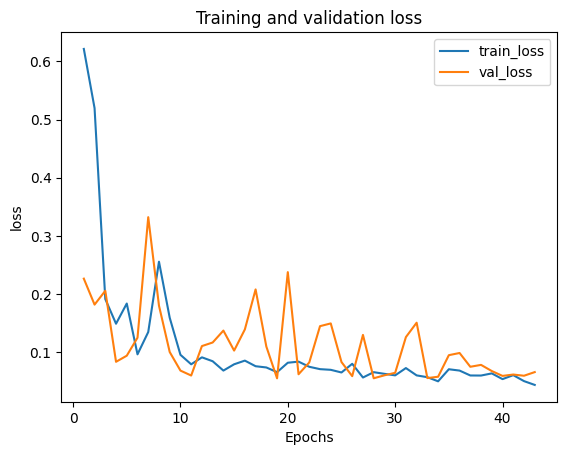

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'loss')

In [221]:
# make class predictions with the model
predictions = (model.predict(all_data.iloc[:,3:]) > 0.5).astype(int)
predictions

236/236 [==============================] - 1s 3ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [222]:
from itertools import chain
predictions = list(chain.from_iterable(predictions))
predictions

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,


In [223]:
unique, counts = np.unique(predictions, return_counts=True)
print (unique)
print(counts)

[0 1]
[2298 5225]


In [224]:
my_dict = {0: 'G1', 1: 'S'}
predictions = [my_dict[i] for i in predictions]
predictions

['S',
 'S',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'G1',
 'G1',
 'G1',
 'G1',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'G1',
 'S',
 'S',
 'S',
 'G1',
 'G1',
 'S',
 'S',
 'S',
 'G1',


In [225]:
pred_all_dta = all_data.copy()
first_column = pred_all_dta.pop('Cell')
pred_all_dta.insert(0, 'Cell', first_column)

In [226]:
pred_all_dta.insert(3, 'Phase_pred', predictions)

In [227]:
pred_all_dta[pred_all_dta['Phase_pred'] != pred_all_dta['Phase']]

,Cell,Type,Phase,Phase_pred,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
157,AAGGTTCCAGGGCTTC-1_Jeff2.bam,HeLa,G1,S,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
160,AAGGTTCGTATTCGTG-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
323,ACGCCAGTCATCGACA-1_First_exp.bam,MCF7,G1,S,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
358,ACGTCAAAGCCAGGAT-1_Normal.bam,MCF7,G1,S,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
405,ACTGCTCAGGTGCAAC-1_Hela1.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,SRR12646264_TCTCATATCACCGCAG-1.bam,HCT116,S,G1,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
7091,SRR12646264_TGCCCATCAATCTCTT-1.bam,HCT116,S,G1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7196,SRR12646266_ACGCCAGAGGCATTGG-1.bam,HCT116_DKO1,S,G1,1,1,1,1,1,1,...,3,3,2,2,2,2,2,2,1,1
7403,SRR12646266_GTAGGCCGTGCGTCAC-1.bam,HCT116_DKO1,S,G1,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2


In [228]:
pred_all_dta[pred_all_dta.Phase_pred != pred_all_dta.Phase].loc[pred_all_dta.Type == 'JEFF']

,Cell,Type,Phase,Phase_pred,chr1:900000-1000000,chr1:1000000-1100000,chr1:1100000-1200000,chr1:1200000-1300000,chr1:1300000-1400000,chr1:1400000-1500000,...,chr22:49700000-49800000,chr22:49800000-49900000,chr22:49900000-50000000,chr22:50000000-50100000,chr22:50100000-50200000,chr22:50200000-50300000,chr22:50300000-50400000,chr22:50400000-50500000,chr22:50500000-50600000,chr22:50600000-50700000
160,AAGGTTCGTATTCGTG-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
405,ACTGCTCAGGTGCAAC-1_Hela1.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
508,AGCATACTCATGGTGT-1_Hela1.bam,JEFF,S,G1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
761,ATGAGGGGTAAGTAAC-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
772,ATGGGAGAGGCATTGG-1_Hela1.bam,JEFF,S,G1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
795,ATTACTCGTTGCTGAT-1_Hela1.bam,JEFF,S,G1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
879,CAAGATCCAGCGTACC-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
906,CAAGTTGTCAACAGCT-1_Hela1.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
958,CACAGGCTCACGAGTT-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1030,CAGCAGCAGCCAGAAC-1_Hela2.bam,JEFF,G1,S,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [229]:
cells_info = pred_all_dta[['Cell','Phase_pred']]
cells_info

,Cell,Phase_pred
0,AAACCTGAGATACACA-1_Hela1.bam,S
1,AAACCTGAGGAGCGTT-1_Jeff1.bam,S
2,AAACCTGAGTAGATCA-1_Hela1.bam,S
3,AAACCTGCAAACTCAC-1_Hela1.bam,S
4,AAACCTGCAACCCAAT-1_First_exp.bam,G1
...,...,...
7518,GSM2904963_delDupl.bam,S
7519,GSM2904964_delDupl.bam,S
7520,GSM2904965_delDupl.bam,S
7521,GSM2904966_delDupl.bam,S


In [ ]:
import tensorflow as tf

localhost_save_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
model.save('../../MnM/data/100kbModel20230809', options=localhost_save_option)

In [231]:
np.savetxt(fname = '../../MnM/data/Regions_for_phase_deep_learning_100kbModel20230809.txt', X = np.array(all_data.columns[3:]), fmt="%s", encoding='utf-8')